# HR Analytics Project- Understanding the Attrition in HR

## Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



In [52]:
#Import EDA libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

#preprocess
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

### Loading the data and descriptive statistics of data

In [53]:
hr_df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Inferences : 
* We have 34 columns with both categorical and numerical variables. 
* Attrition is the target which is categorical (binary) with 'yes' or 'no', the problem is Binary classification
_Binary Classification_

## Exploratory Data Analysis :
> This involves

* Understanding the data
* Finding the null values in data and addressing the null values
* Differentiating categorical and continuous features
* Univariate analysis
* Bivariate analysis
* finding the outliers and skewness in continious features
* addressing the outliers and skewness
* Finding and addressing the multicolinearity if any
* Encoding the categorical features
* Scaling the features
* Balancing the target if imbalanced

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> _Inferences <
* Total of 1470 rows and 35 columns
* 9 columns like attrition,business travel,overtime ,over18 etc are of object type categorical data and to be encoded to integers
* from above there are no null but confirming as below again

In [54]:
hr_df.isnull().sum().sum()

0

> Inferences
* It can be confirmed that there are no nulls

In [55]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


> Inferences from describe

* It can be observed in all features count is 1470, there are no nulls
* Education is categorical
* Employeecount is 1 for all the records and hence can be ignored from prediction
* Mean is more than 50% quantile in some columns ex: Distancefromhome , yearssincelastpromotion which implies data is     skewed to right which can be verified and addressed if skewness exists
* OUtliers tend to be visible in columns like Yearsatcompany, yearsin currentrole, years since last promotion, years with curr manager, distance from home etc as considerable difference is present between 75% and the max

In [56]:
hr_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

> Inference: 

EmployeeCount ,    Over18 ,     StandardHours these columns have only one values and can be removed from prediction as
they will not effect 

In [57]:
print("Shape of Dataset before dropping columns: ",hr_df.shape)
hr_df.drop(columns=["EmployeeCount","Over18","StandardHours"],inplace=True)
print("3 columns are dropped and shape is :" ,hr_df.shape)

Shape of Dataset before dropping columns:  (1470, 35)
3 columns are dropped and shape is : (1470, 32)


### Data Visualisaion:

> for data visualisation , columns to be identified as continuous or categorical

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


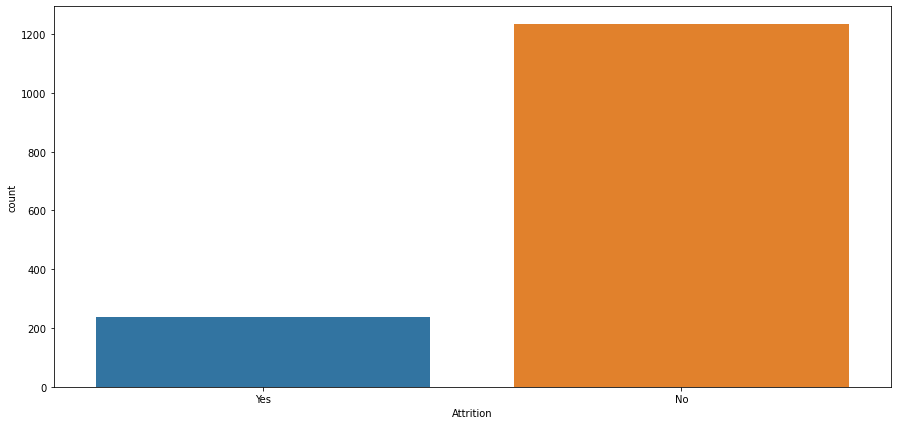

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


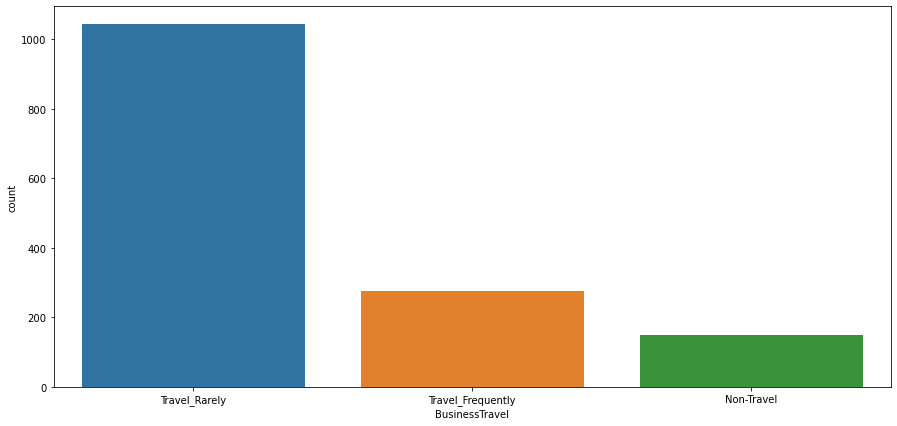

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


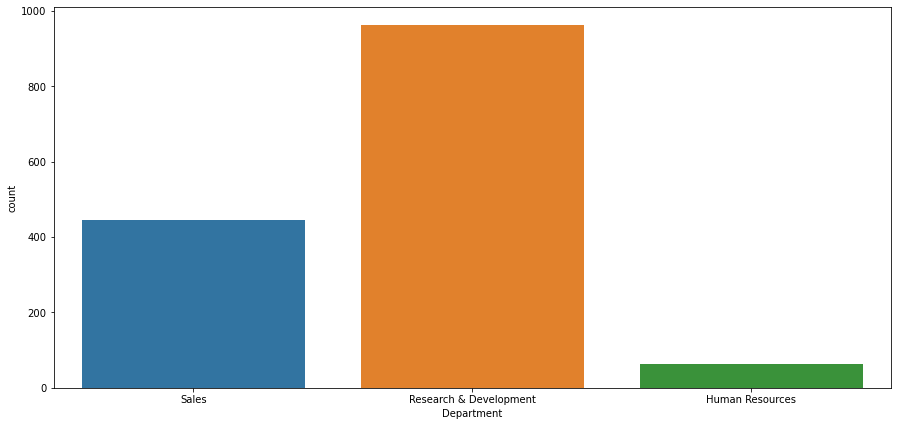

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


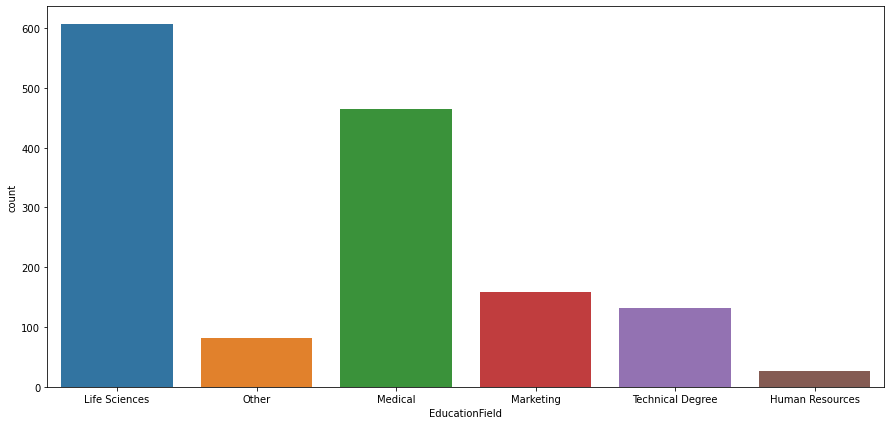

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


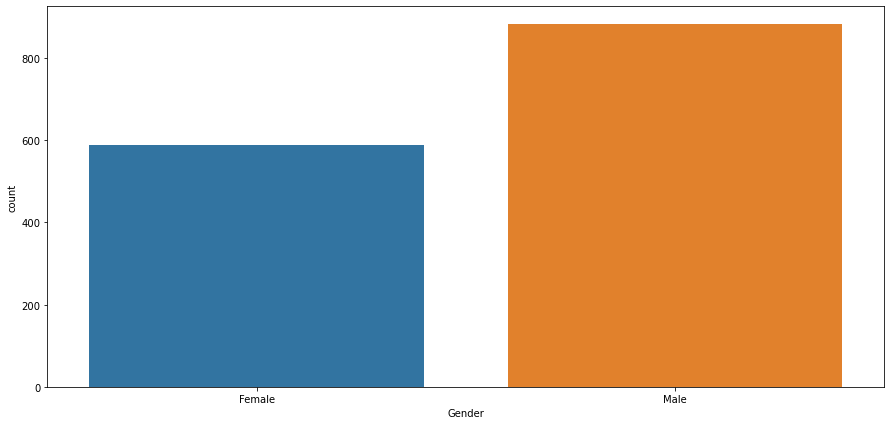

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


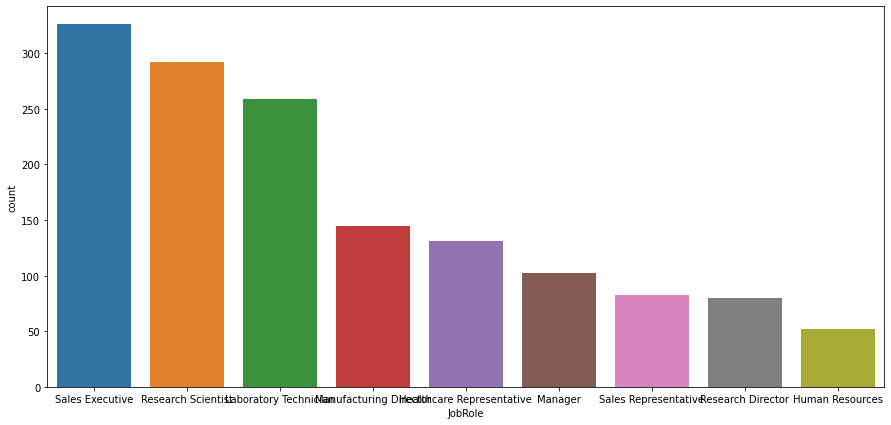

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


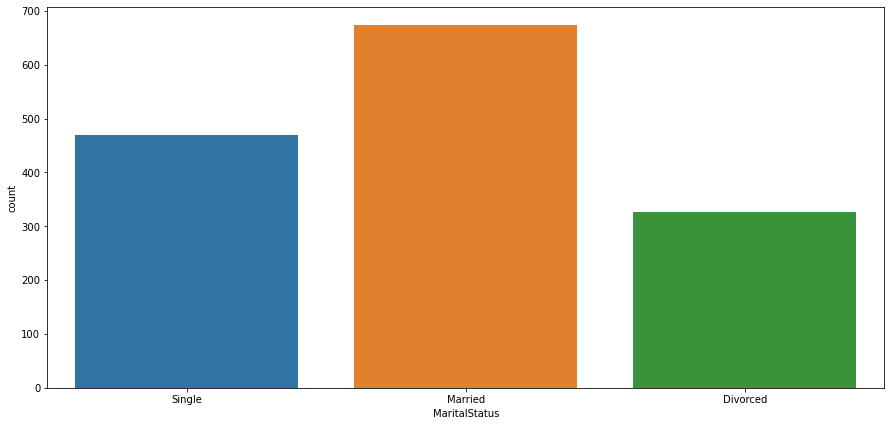

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


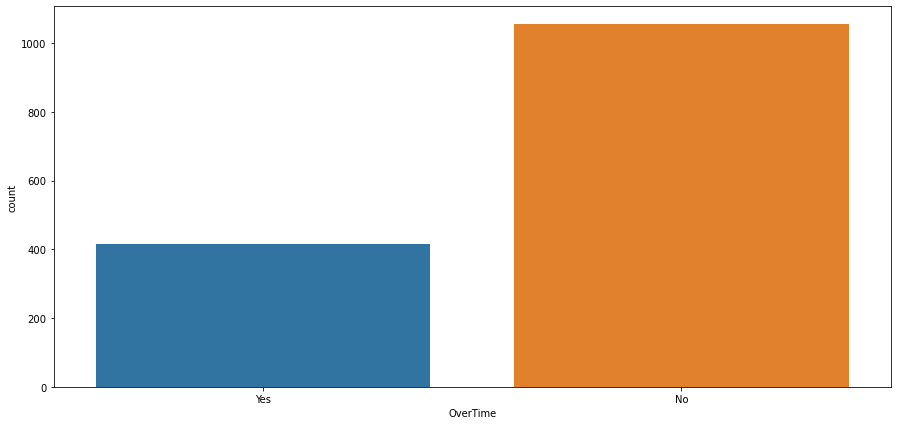

In [58]:
for i in hr_df.columns:
    if hr_df.dtypes[i]=="object":
        plt.figure(figsize=(15,7))
        sns.countplot(hr_df[i])
        plt.show()

> Inferences from visualisation of categorical features

* Attrition : Large disparity can be observed in counts of yes and no. as it is target variable data has to be balanced
* Business Travel: count of travel rarely is very high compared to other two travel frequently and non travel
* Department : Head count of reasearch and development is very high when compared to sales and human resource, human resource head count is very meagre
* Education Field: Education field of highest no of head count is Life sciences and lowest in Human resources, this is inline with the department head count. 
* Gender: Head count of female and male are normal and not imbalanced
* Overtime : visible variation of difference in coun of yes and no for overtime.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


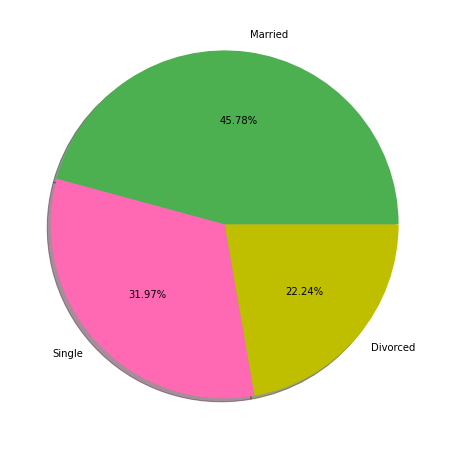

In [59]:
# Visualising the marital status of employee
print(hr_df["MaritalStatus"].value_counts())
labels='Married','Single','Divorced '
colors = ["#4CAF50", "hotpink", "y"]
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(hr_df['MaritalStatus'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

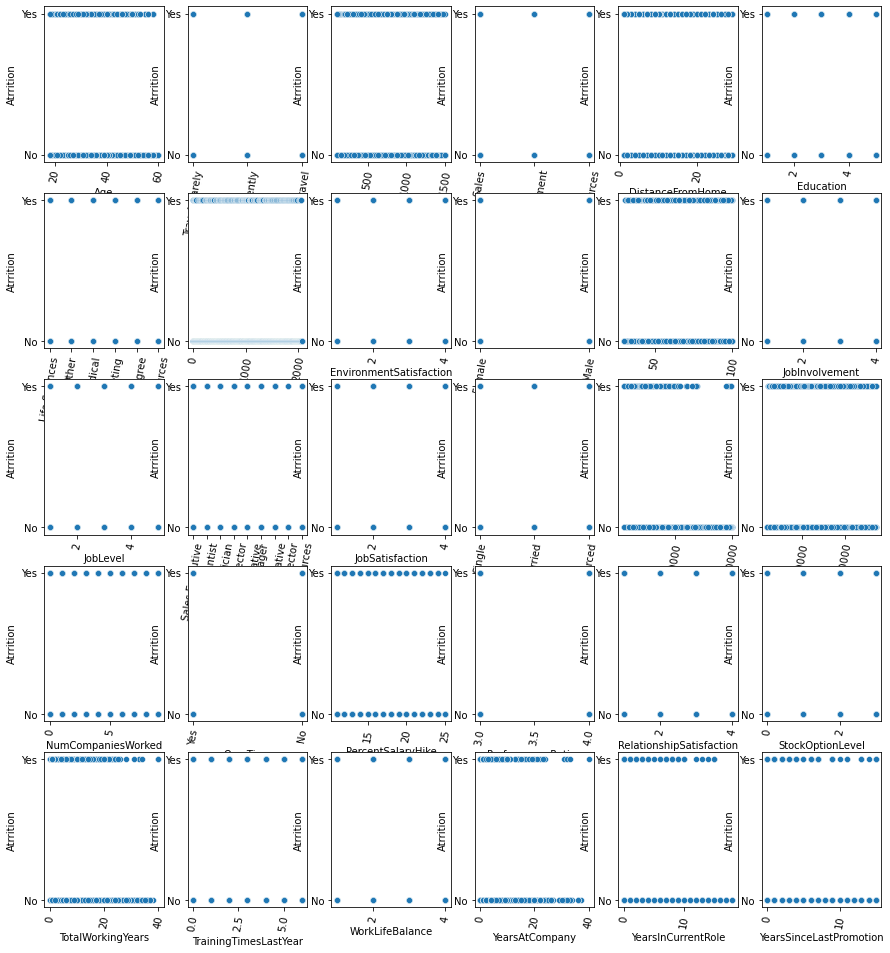

In [8]:
#Now let us plot relation between Label and our features
x=hr_df.drop('Attrition',axis=1)
y=hr_df['Attrition']
plt.figure(figsize=(15,20))
p=1
for i in x:
    if p<31:
        plt.subplot(6,6,p)
        sns.scatterplot(x=x[i],y=y)
        plt.xticks(rotation=80)
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Atrrition',fontsize=10)
    p+=1
plt.show()

### Bivariate Analysis

* Comparision of features to target

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Comparision between Attrition and Age')

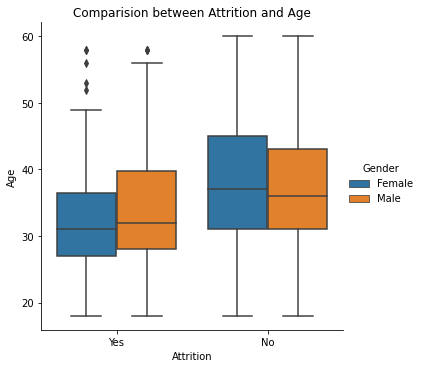

In [60]:
# Visualizing the age of the employees who left and stayed 
sns.factorplot(x='Attrition',y='Age',data=hr_df,kind="box",size=5,hue='Gender')
plt.title('Comparision between Attrition and Age')

Female employees have less Atrrition rate, Male both are equal

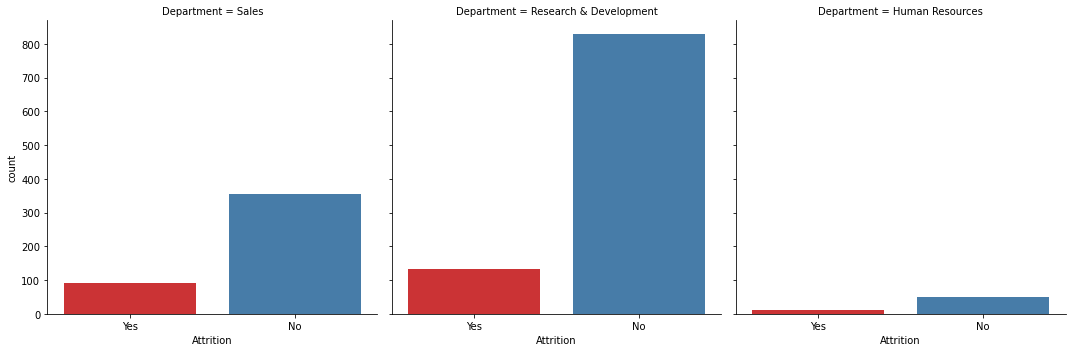

In [61]:
sns.catplot(x='Attrition',col='Department',data=hr_df,kind='count',palette="Set1")

Hr department have high percentage of Attrition compared to other two department

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


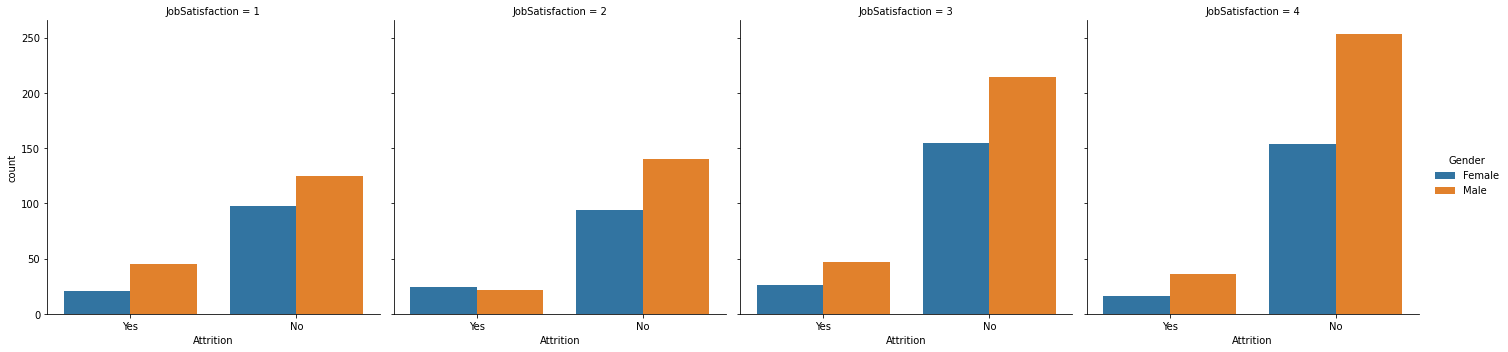

In [62]:
#Job Satisfaction
sns.factorplot(data=hr_df,kind='count',x='Attrition',col='JobSatisfaction',hue='Gender')

This indicates an interesting trend. Note that for higher values of job satisfaction (i.e. a person is more satisfied with their job) a lower percentage of them say 'yes' which is quite clear because highly satisfied workers will avoid Attrition

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


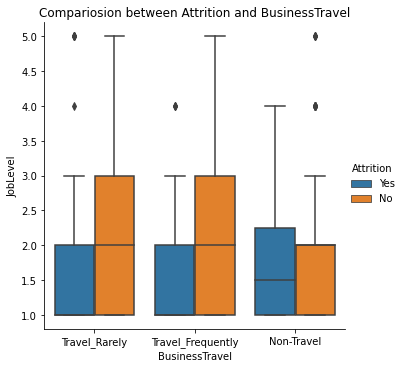

In [63]:
print(hr_df["BusinessTravel"].value_counts())
sns.catplot(x="BusinessTravel",y='JobLevel',data=hr_df,hue="Attrition",kind="box")
plt.title("Compariosion between Attrition and BusinessTravel")
plt.show()

Job higher level travel more and their Attrition level is low so people likes to travel. For non travelers attrition rate is high

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.2% of the points

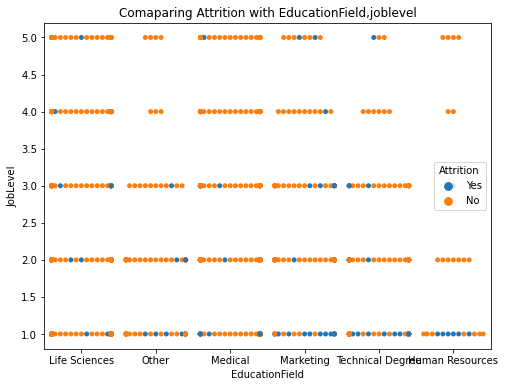

In [64]:
# Checking how the attrition perform according to the employees EducationField and joblevel
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with EducationField,joblevel")
sns.swarmplot(x='EducationField',y='JobLevel',hue='Attrition',data=hr_df)
plt.show()

this is clear lower job level and marketing,Human resource have high rate, of attrition

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


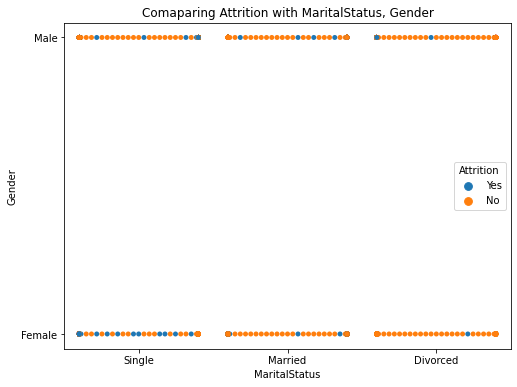

In [65]:
# Checking how the attrition perform according to the employees Maritalstatus
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with MaritalStatus, Gender")
sns.swarmplot(x=hr_df['MaritalStatus'],y=hr_df['Gender'],hue=hr_df["Attrition"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points

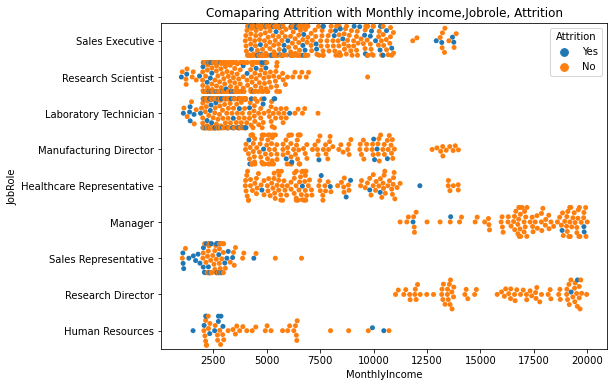

In [66]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Monthly income,Jobrole, Attrition")
sns.swarmplot(x=hr_df['MonthlyIncome'],y=hr_df['JobRole'],hue=hr_df["Attrition"])
plt.show()

Lower income have high attrition rate.

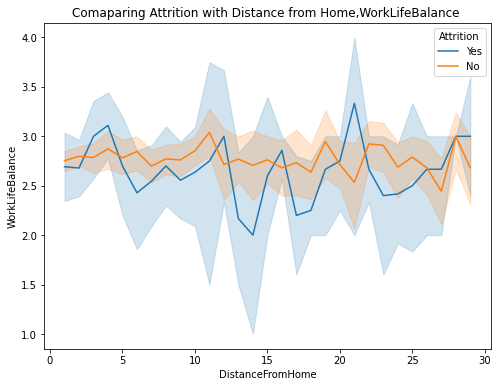

In [67]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Distance from Home,WorkLifeBalance ")
sns.lineplot(x=hr_df['DistanceFromHome'],y=hr_df['WorkLifeBalance'],hue=hr_df["Attrition"])
plt.show()

As distance increases, attrition also get increases

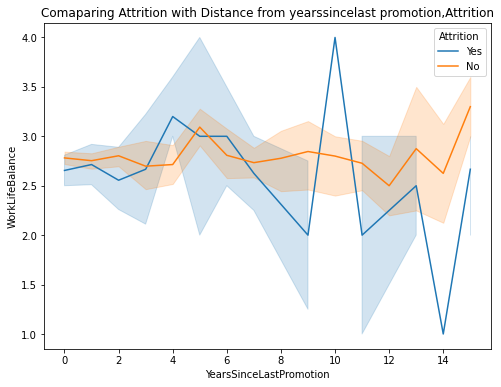

In [68]:
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Distance from yearssincelast promotion,Attrition")
sns.lineplot(x=hr_df['YearsSinceLastPromotion'],y=hr_df['WorkLifeBalance'],hue=hr_df["Attrition"])
plt.show()

In [ ]:
As years since promtion increases attrition level also get differs

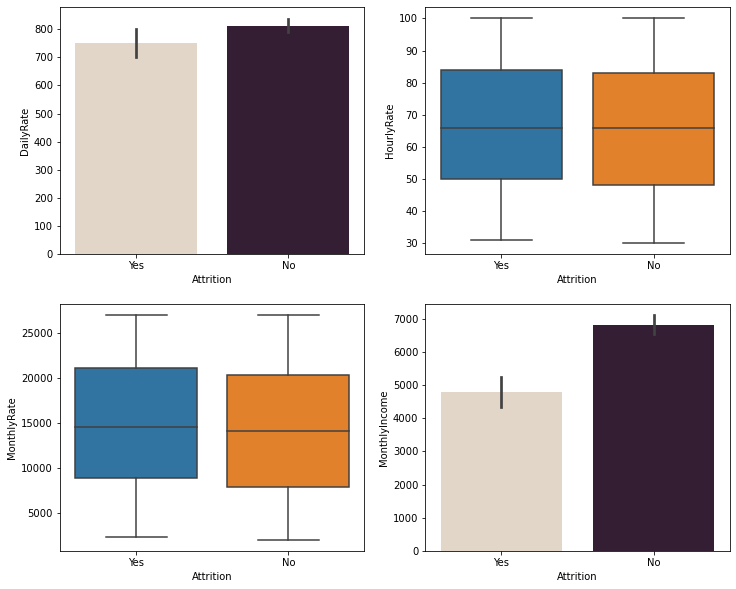

In [69]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in Dailyrate
sns.barplot(x='Attrition',y='DailyRate',ax=axes[0,0],data=hr_df,palette="ch:.25")

# Checking attrition level in hourlyrate
sns.boxplot(x='Attrition',y='HourlyRate',ax=axes[0,1],data=hr_df)

# Checking attrition level in Monthlyrate
sns.boxplot(x='Attrition',y='MonthlyRate',ax=axes[1,0],data=hr_df)

# Checking attrition level in Monthlyincome
sns.barplot(x='Attrition',y='MonthlyIncome',ax=axes[1,1],data=hr_df,palette="ch:.25")
plt.show()

1.First plot shows that the Employees working with lower daily rate wants to leave the organization compared to employees working with higher dailyrate.

2.In the second plot both Attrition and HourlyRate equal which means there is no significant difference in attrition and hourlyrate, so hourlyrate wont affect the attrition.

3.The third plot shows the MonthlyRate for "Yes" is bit higher than "No" attrition.

4.In the fourth plot, the MonthlyIncome for "No" attrition is quite high than the "Yes" attrition and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

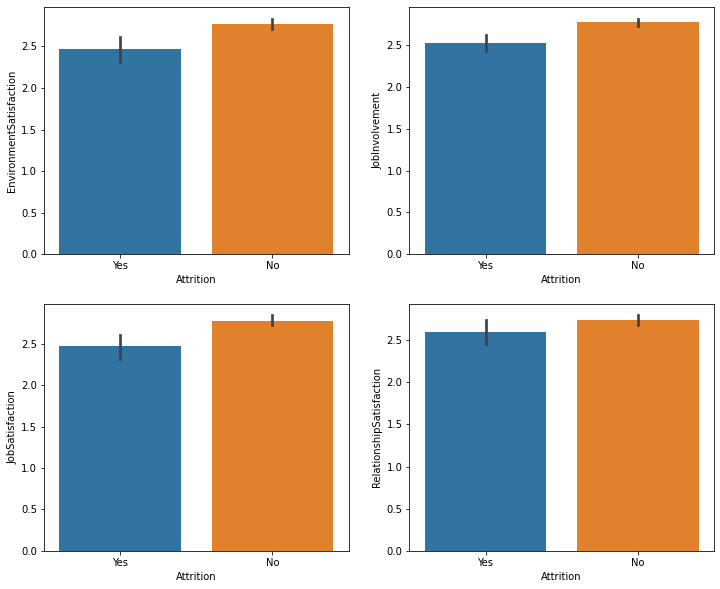

In [70]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',ax=axes[0,0],data=hr_df)

# Checking attrition level in JobInvolvement
sns.barplot(x='Attrition',y='JobInvolvement',ax=axes[0,1],data=hr_df)

# Checking attrition level in JobSatisfaction
sns.barplot(x='Attrition',y='JobSatisfaction',ax=axes[1,0],data=hr_df)

# Checking attrition level in RelationshipSatisfaction
sns.barplot(x='Attrition',y='RelationshipSatisfaction',ax=axes[1,1],data=hr_df)
plt.show()

From this its clear all these are higly related to label and there might be chances of multicolinearity
YearsAtCompany, TotalWorkingYears, YearsInCurrentRole and YearsSinceLastPromotion

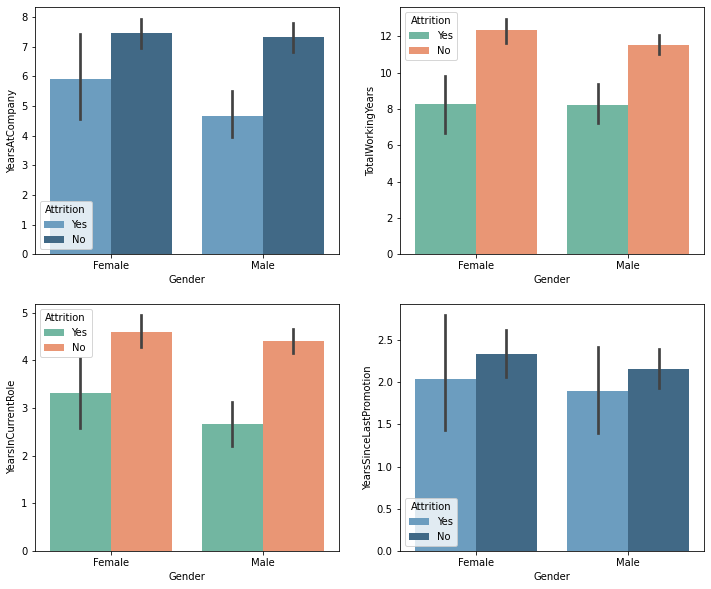

In [71]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in YearsAtCompany
sns.barplot(x='Gender',y='YearsAtCompany',ax=axes[0,0],data=hr_df,hue='Attrition',palette="Blues_d")

# Checking attrition level in TotalWorkingYears
sns.barplot(x='Gender',y='TotalWorkingYears',ax=axes[0,1],data=hr_df,hue='Attrition',palette="Set2")

# Checking attrition level in YearsInCurrentRole
sns.barplot(x='Gender',y='YearsInCurrentRole',ax=axes[1,0],data=hr_df,hue='Attrition',palette="Set2")

# Checking attrition level in YearsSinceLastPromotion
sns.barplot(x='Gender',y='YearsSinceLastPromotion',ax=axes[1,1],data=hr_df,hue='Attrition',palette="Blues_d")
plt.show()

In [ ]:
Female employees are spending more years at company but the "Yes" attrition for female employees are more than male.

As same as above the Total Working Years of female employees is more than the male employees and the "Yes" attrition for male and female employees are same.

Here also the female employees spending more years in the current organization compare to male employees and also they are facing attrition.

The female employees spend more years since their last promotion than male.

From the above observation we can say that the spending years of female employees is more than male and the wants to quit the organization.

3    1244
4     226
Name: PerformanceRating, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


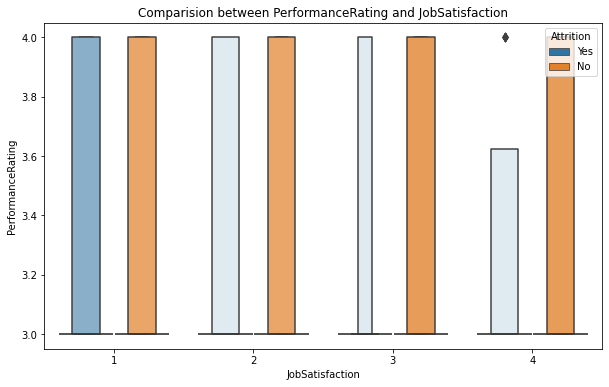

In [72]:
print(hr_df["PerformanceRating"].value_counts())
plt.figure(figsize=(10,6))
sns.boxenplot('JobSatisfaction','PerformanceRating',data=hr_df,hue='Attrition')
plt.title("Comparision between PerformanceRating and JobSatisfaction")
plt.show()

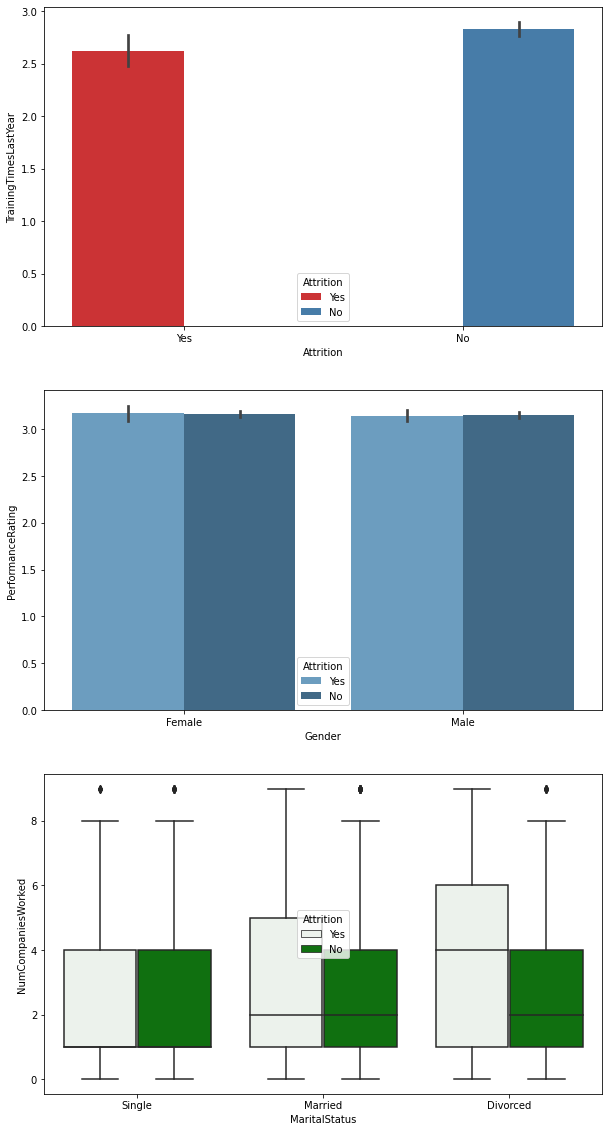

In [82]:
fig,axes=plt.subplots(3,1,figsize=(10,20))

# Checking attrition level in TrainingTimesLastYear
sns.barplot(x='Attrition',y='TrainingTimesLastYear',ax=axes[0],data=hr_df,hue='Attrition',palette="Set1")

# Checking attrition level in PerformanceRating
sns.barplot(x='Gender',y='PerformanceRating',ax=axes[1],data=hr_df,hue='Attrition',palette="Blues_d")

# Checking attrition level in NumCompaniesWorked
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',ax=axes[2],data=hr_df,hue='Attrition',color="g")
plt.show()

In [ ]:
> Inferences:

1.The data is unbalanced by class, we have 83% who did not leave the company and 17% who left the company

2.The age group of IBM employees in this data set is between 25-45 years old

3.Attrition is more common in younger age groups and is more likely among females As expected, it is more common among single employees

4.People who leave the company have fewer opportunities to travel around the company.

5.People with very high education tend to have lower friction

From the visualization plots we can conclude that below mentioned category are having higher attrition rate:

1.Sales department among all the departments

2.Human Resources and Technical Degree in Education

3.Single’s in Marital status (Will not use this due to GDPR)

4.Male in comparison to females in Gender (Will not use this due to GDPR)

5.Employee with job satisfaction value 1

6.Job level 1 in job level

7.Life balance having value 1

8.Employee staying at distant place

9.Environment Satisfaction value 1

### Correlation

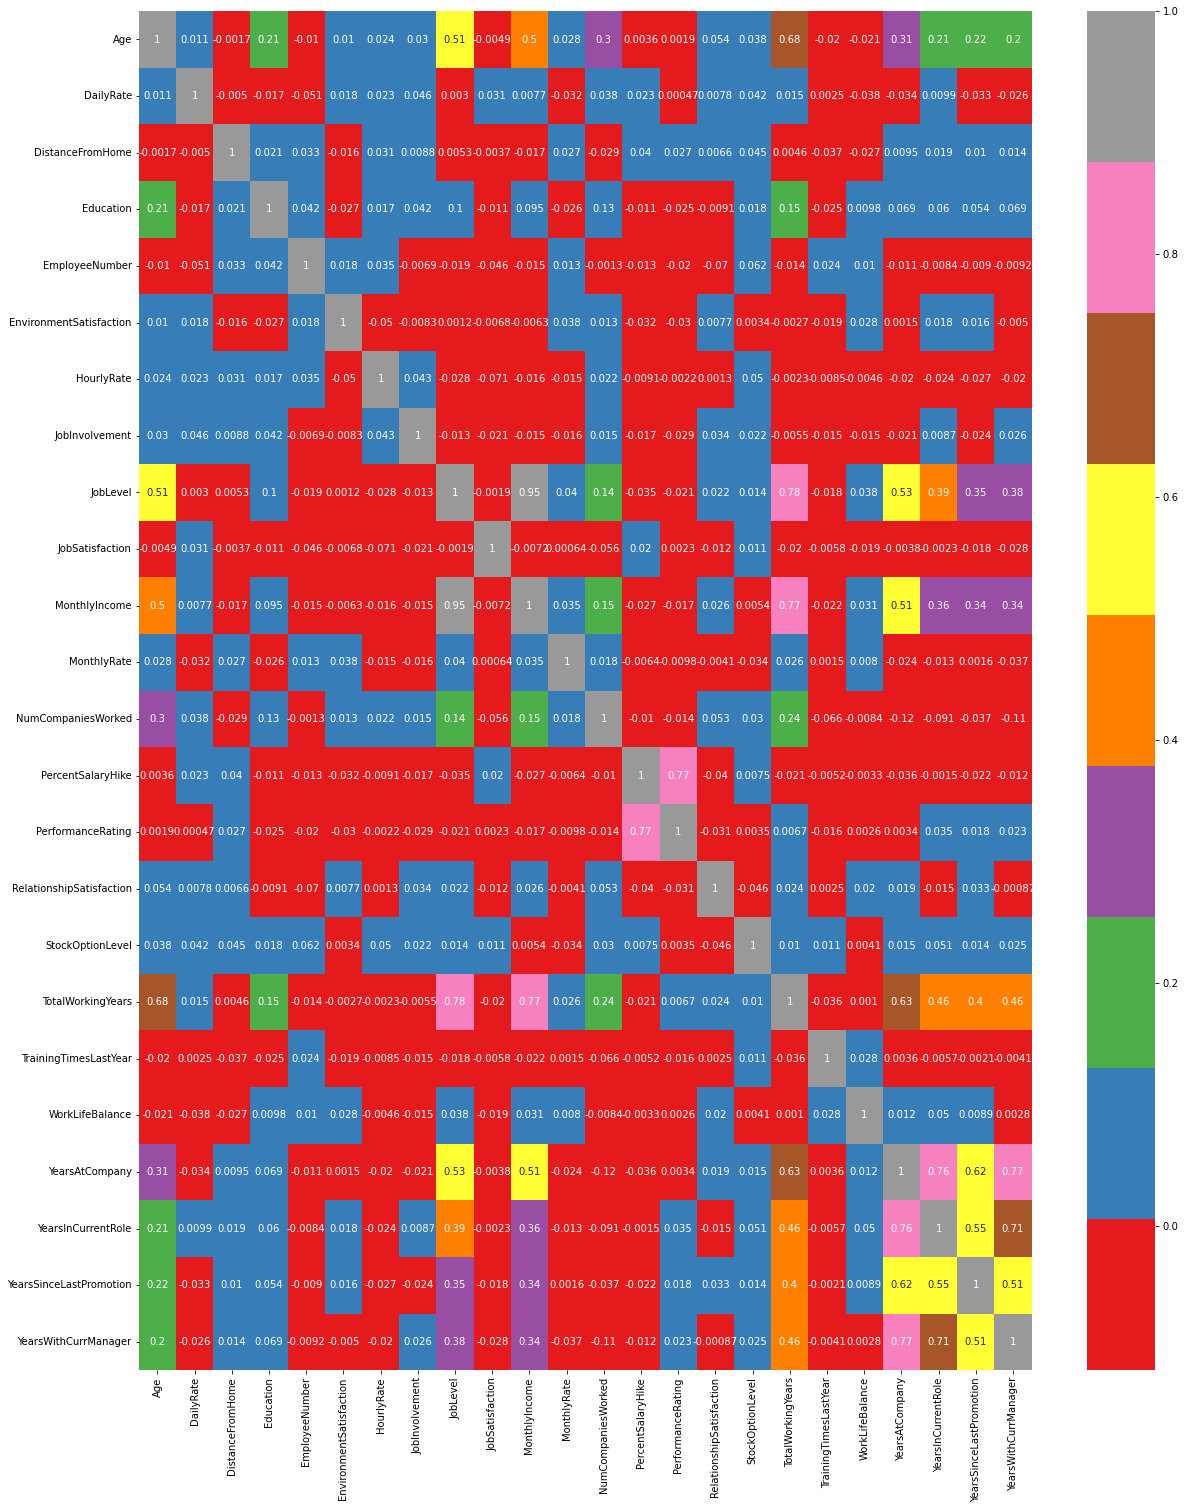

In [73]:
plt.figure(figsize=(20,25))
sns.heatmap(hr_df.corr(),annot=True,cmap='Set1')
plt.show()

>Inferences:

"JobLevel" is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

"MonthlyIncome" is very strongly related to joblevel as expected as senior employees will definately earn more.

"PerformanceRating" is highly related to PercentSalaryHike which is quite obvious.

Also note that "TotalWorkingYears" is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

"YearsWithCurrManager" is highly related to "YearsAtCompany".

"YearsAtCompany" is related to "YearsInCurrentRole".

Note: that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

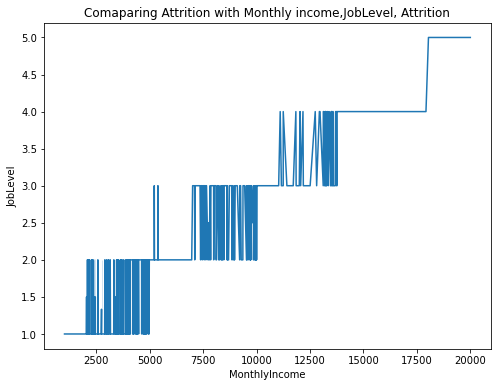

In [74]:
#let us visualize relation between monthlyincome and joblevel
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with Monthly income,JobLevel, Attrition")
sns.lineplot(x=hr_df['MonthlyIncome'],y=hr_df['JobLevel'])
plt.show()

This clearly shows that as job level increases ,salary also get increases

### Outliers

In [76]:
# Now checking for numerical columns
numerical_col=[]
for i in hr_df.dtypes.index:
    if hr_df.dtypes[i]!='object':
        numerical_col.append(i)


# checking for categorical columns
categorical_col=[]
for i in hr_df.dtypes.index:
    if hr_df.dtypes[i]=='object':
        categorical_col.append(i)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

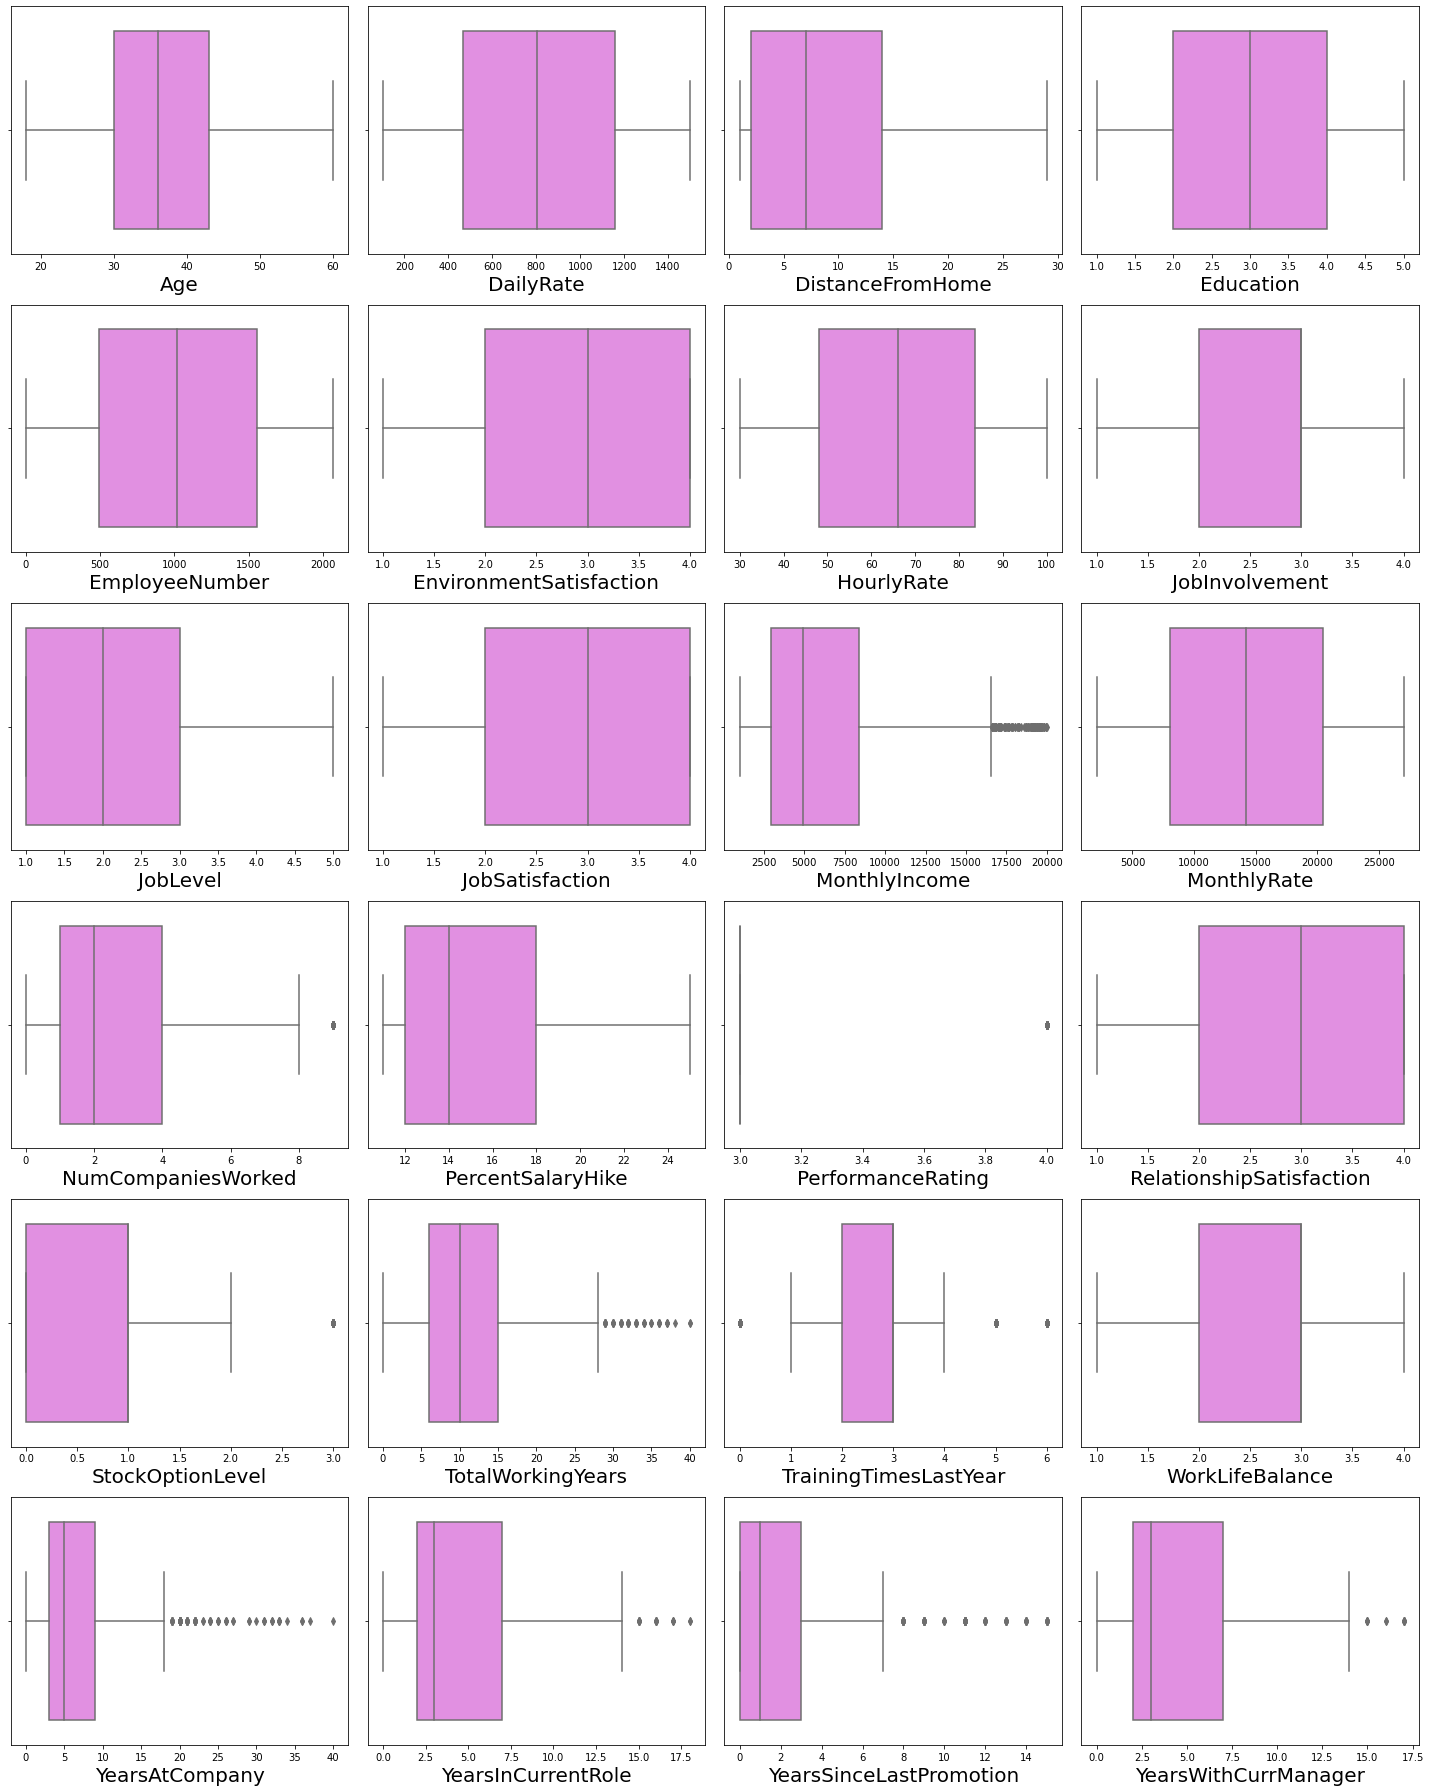

In [77]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(hr_df[column],color="violet")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers present in the columns MonthlyIncome, NumCompaniesWorked, performanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. We will remove these outliers using either Zscore or IQR mathod in the further steps.

#### Addressing outliers using Z score

In [78]:
#Seperating outliers
feature_cols = hr_df[['MonthlyIncome', 'NumCompaniesWorked','PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
# import necessary library
from scipy.stats import zscore
z=np.abs(zscore(feature_cols))

z

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613,0.063296,0.679146,0.245834
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508,0.764998,0.368715,0.806541
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294,1.167687,0.679146,1.155935
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947,0.764998,0.252146,1.155935
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893,0.615492,0.679146,0.314873
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333,0.764998,0.368715,0.806541
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613,0.615492,0.679146,0.314873
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228,0.488900,0.679146,1.086895


In [79]:
# Creating new dataframe removing oputliers
new_df = hr_df[(z<3).all(axis=1)] 
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

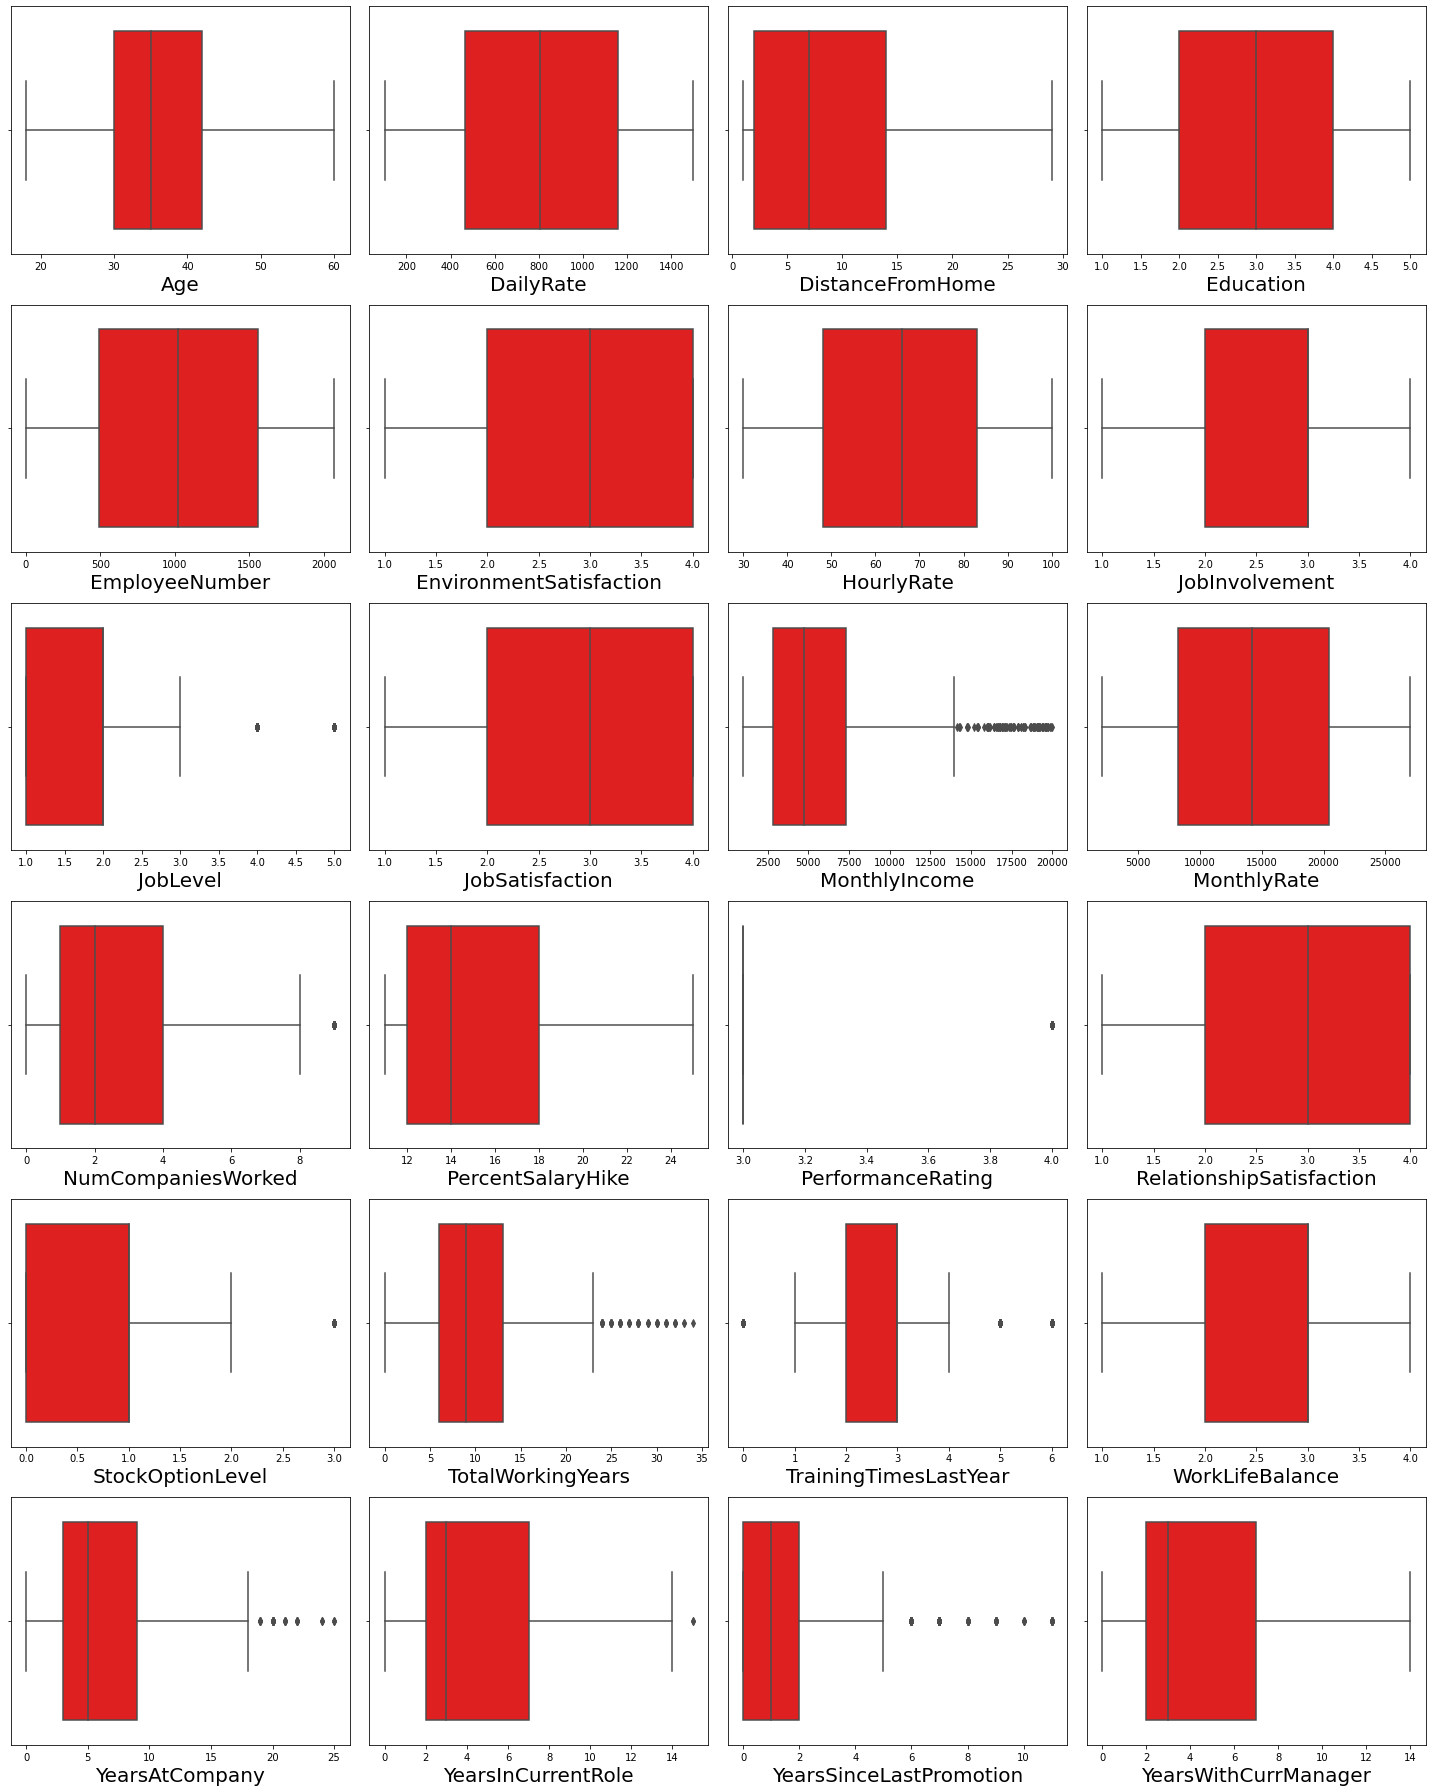

In [80]:
#letus plot again
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [81]:
print("Shape of hr_df",hr_df.shape)
print("shape of new_df",new_df.shape)
print("percentage of Data loss is:",(hr_df.shape[0] - new_df.shape[0])/(hr_df.shape[0]*100))

Shape of hr_df (1470, 32)
shape of new_df (1387, 32)
percentage of Data loss is: 0.000564625850340136


Total 5% data Loss in our data that is acceptable which is less than 10%

#### IQR

In [82]:
# 1st quantile
Q1=feature_cols.quantile(0.25)
#3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1

iqrdf=hr_df[~((hr_df < (Q1 - 1.5 * IQR)) |(hr_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("percentage of data loss by IQR", (hr_df.shape[0] - iqrdf.shape[0]) / (hr_df.shape[0] * 100) )


percentage of data loss by IQR 0.004700680272108844


C:\Users\91990\AppData\Local\Temp/ipykernel_10924/1361961885.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  iqrdf=hr_df[~((hr_df < (Q1 - 1.5 * IQR)) |(hr_df > (Q3 + 1.5 * IQR))).any(axis=1)]


47% of data loss with iqr method that is not acceptable, So we will move forward with zscore method

#### Addressing Skewness:


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

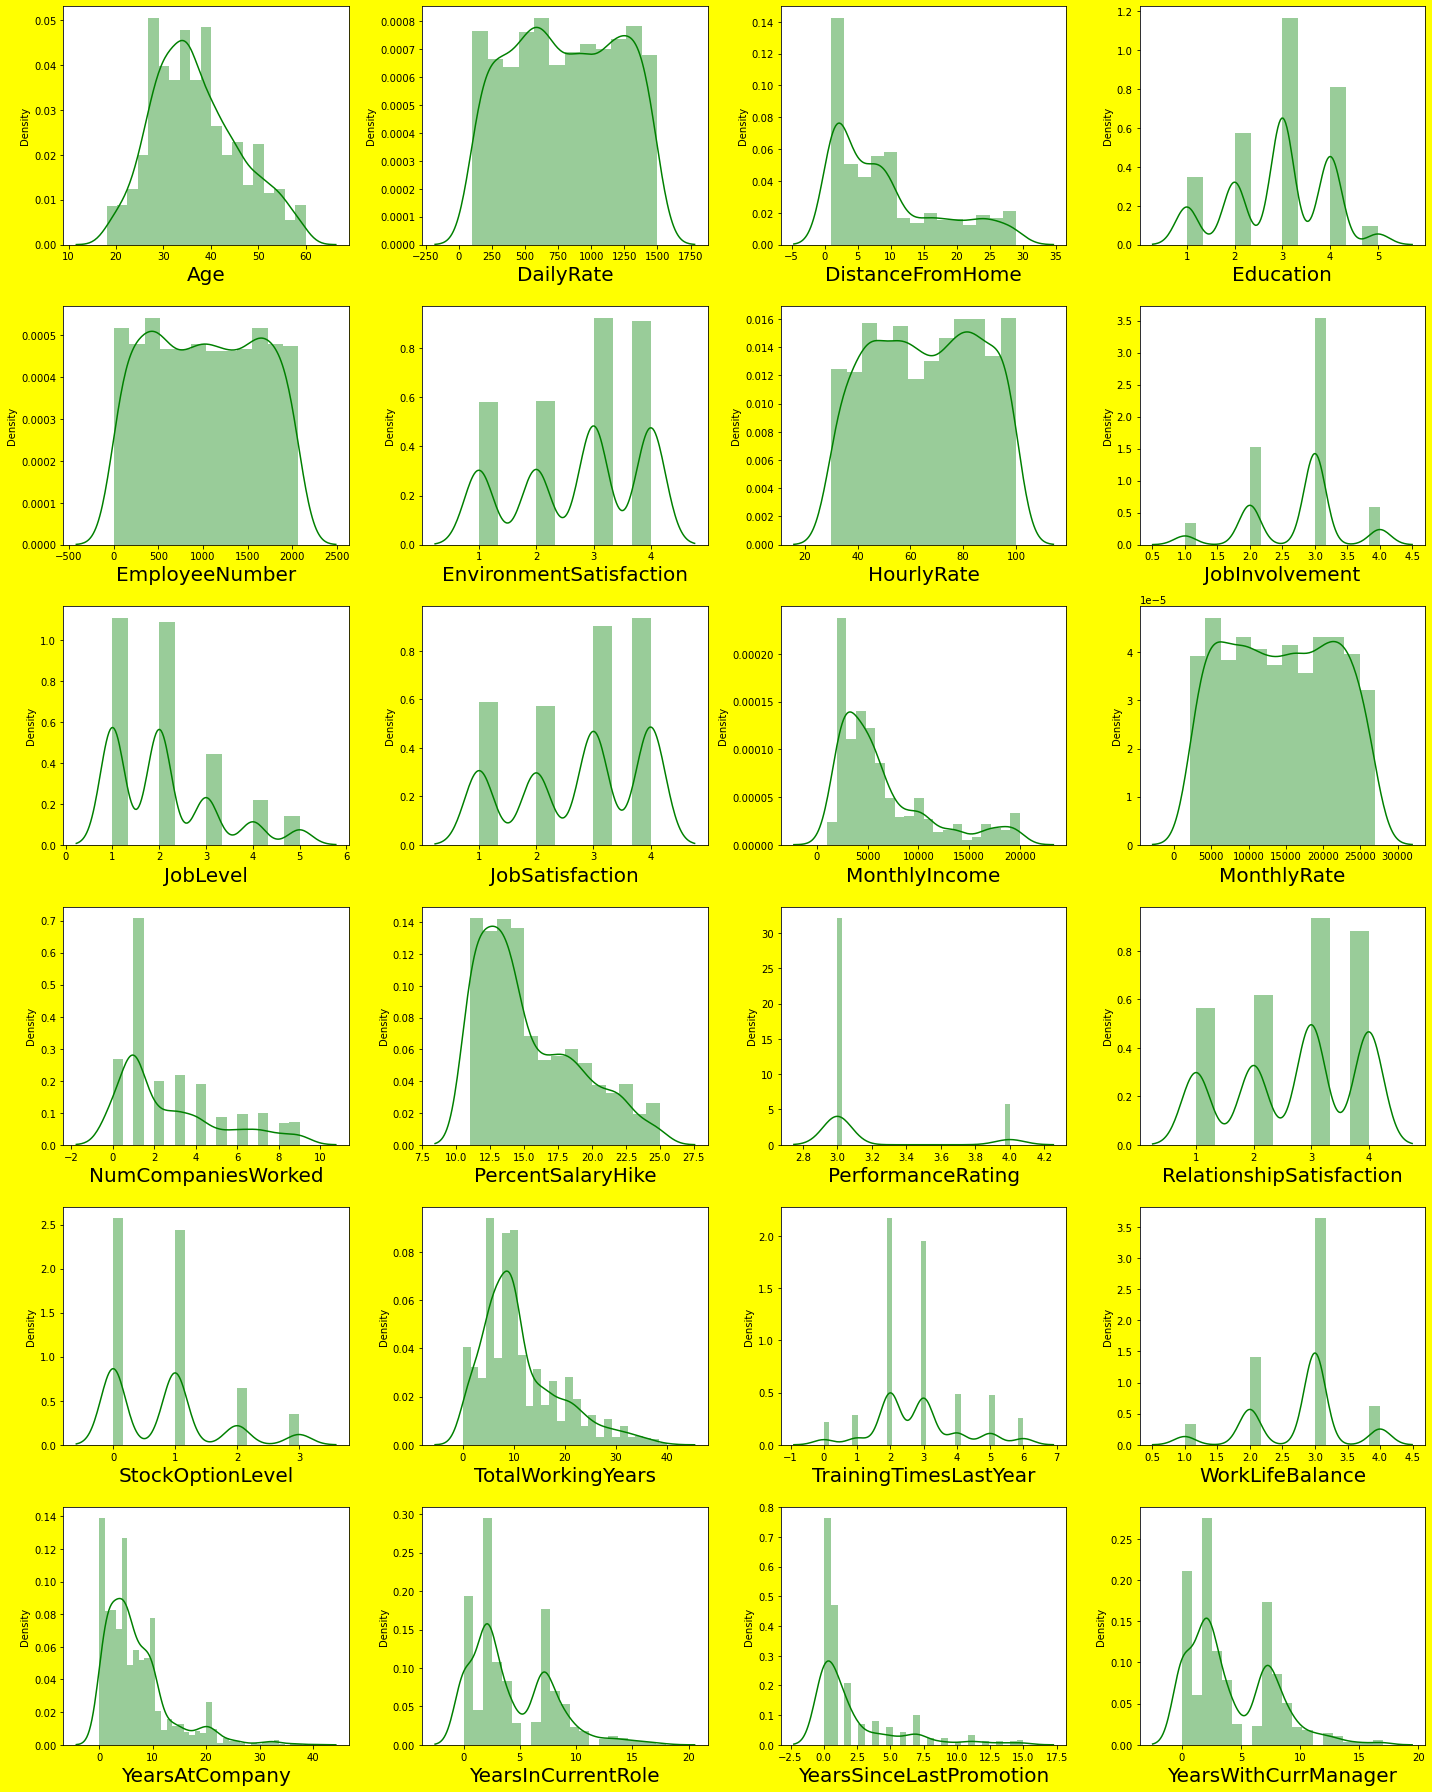

In [83]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(hr_df[column],color="g")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot we can infer that the Age column seems to be normal and there is no skewness in this column.

The columns DailyRate, HourlyRate and MonthlyRate are almost normally distributed and these columns have no skewness.

Apart from the above mentioned columns, none of the columns are normally distributed and all of them are skewed. We will remove these skewness later.

### Skewness removal

In [89]:
#checking skewness
new_df.skew()

C:\Users\91990\AppData\Local\Temp/ipykernel_10924/3275403545.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [90]:
# Removing skewness using yeo-johnson  method to get better prediction
skew_data = ['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
new_df[skew_data] = scaler.fit_transform(new_df[skew_data].values)
new_df[skew_data].head

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<bound method NDFrame.head of       DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0            -1.489968  0.349828       0.386674            1.620671   
1             0.244561  0.349828       0.144235           -0.561880   
2            -1.028366 -1.141761      -1.431153            1.273711   
3            -0.698191 -1.141761      -0.814425           -0.561880   
4            -1.028366 -1.141761      -0.504453            1.764103   
...                ...       ...            ...                 ...   
1465          1.408969  0.349828      -1.039557            0.798319   
1466         -0.049519  1.133237       1.127335            0.798319   
1467         -0.440553  0.349828       0.424210           -0.561880   
1468         -1.028366  0.349828       0.222228            0.052119   
1469          0.244561  0.349828      -0.101930            0.052119   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0             -1.495549         -1.084263          -0

In [91]:
new_df.skew()

C:\Users\91990\AppData\Local\Temp/ipykernel_10924/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

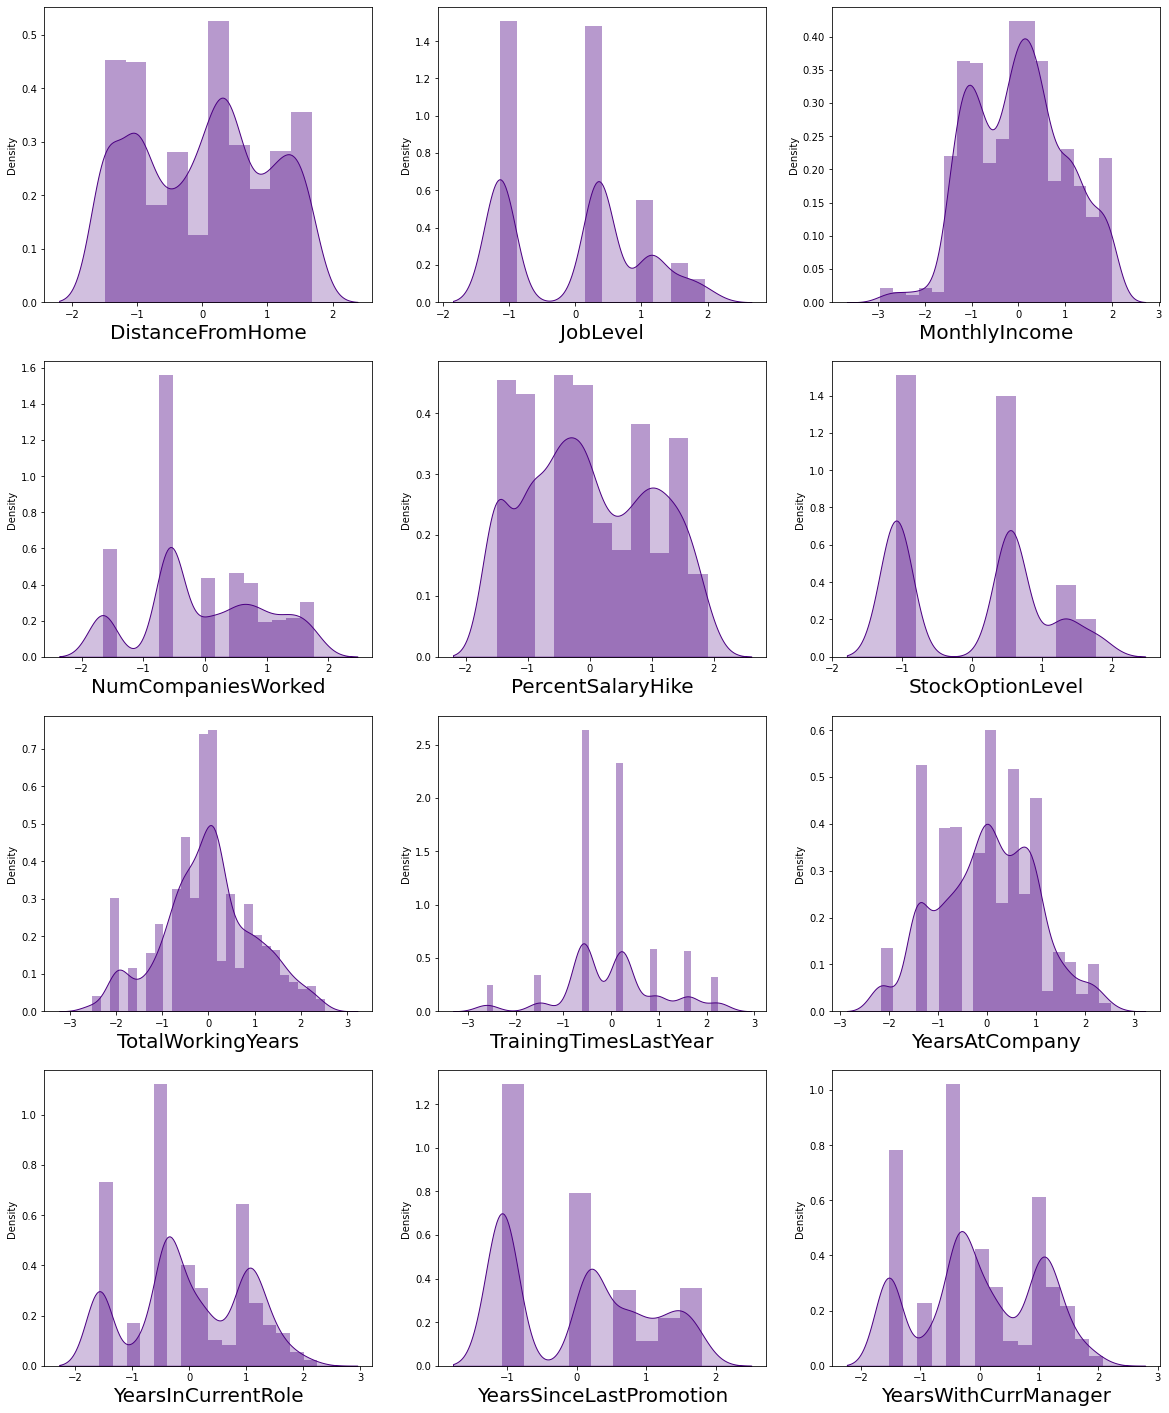

In [92]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew_data]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding 

In [93]:
categorical_col =['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


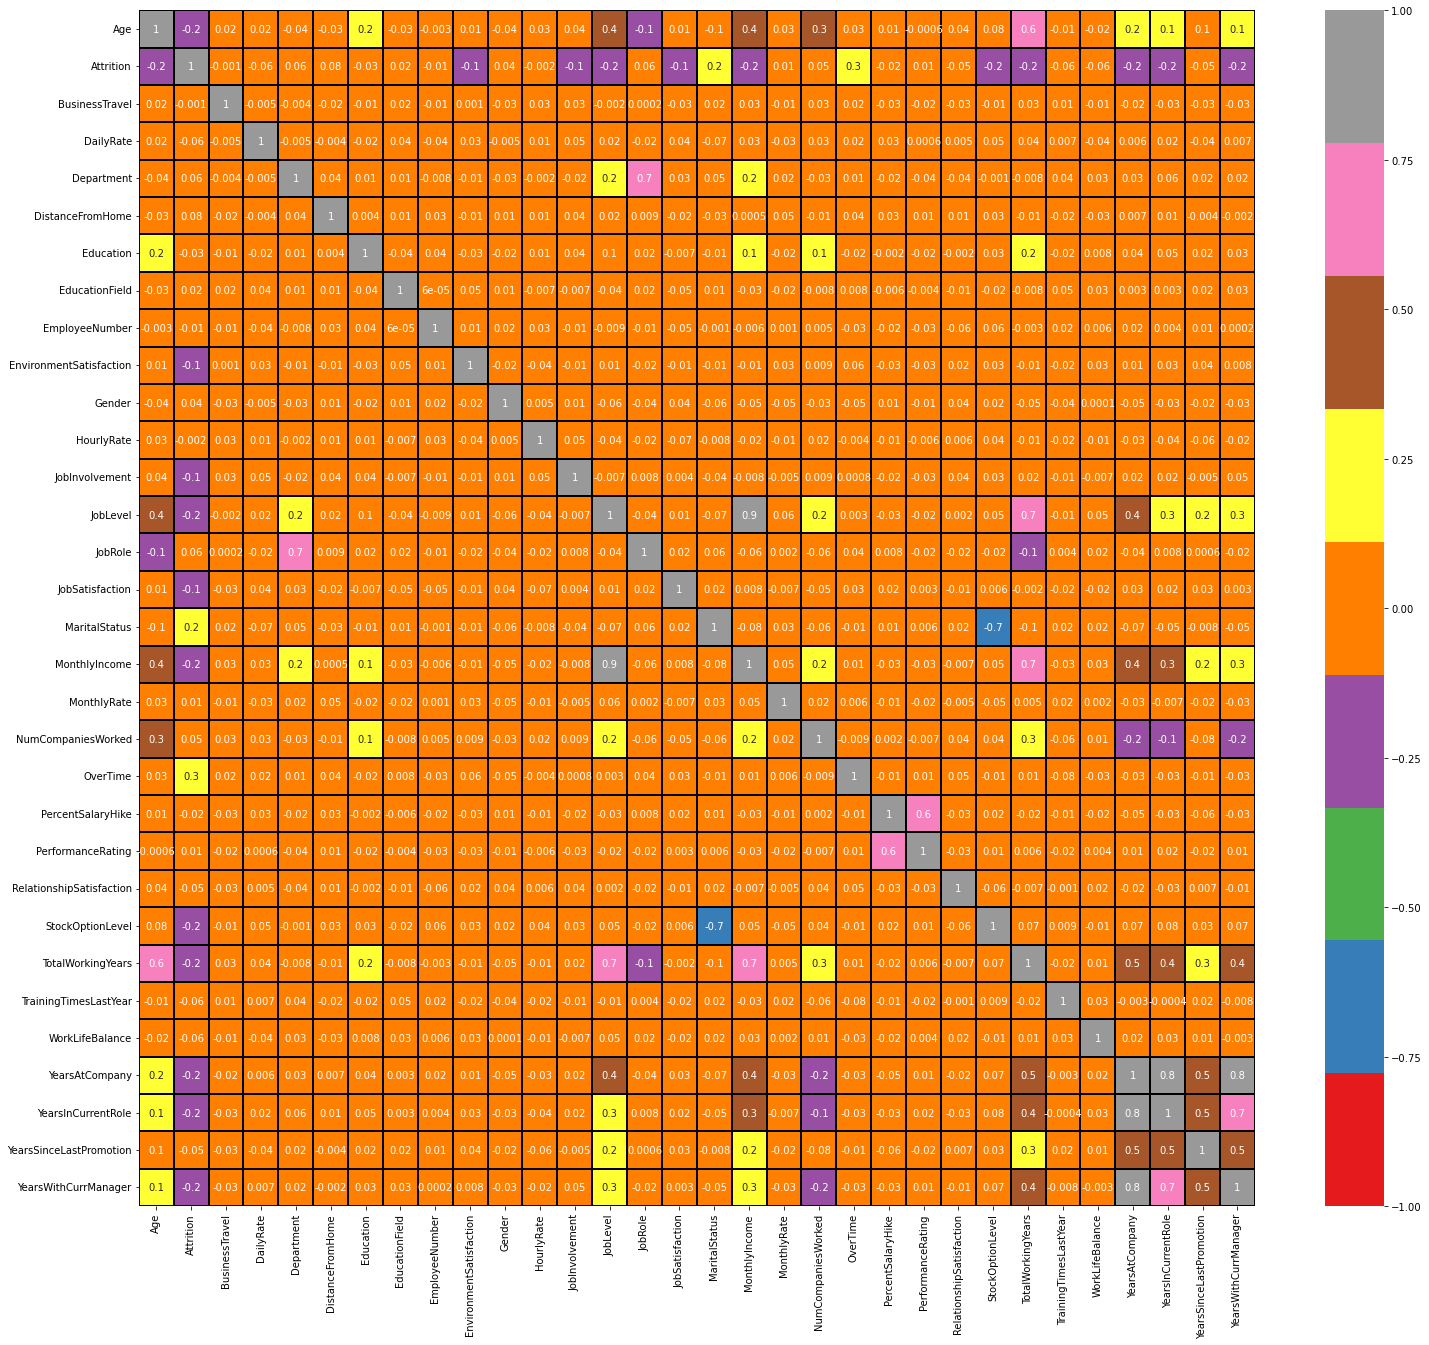

In [94]:
# Correlation between the target variable and independent variables using HEAT map after encoding
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="Set1")
plt.yticks(rotation=0);

Visualizing the correlation between label and features using bar plot:

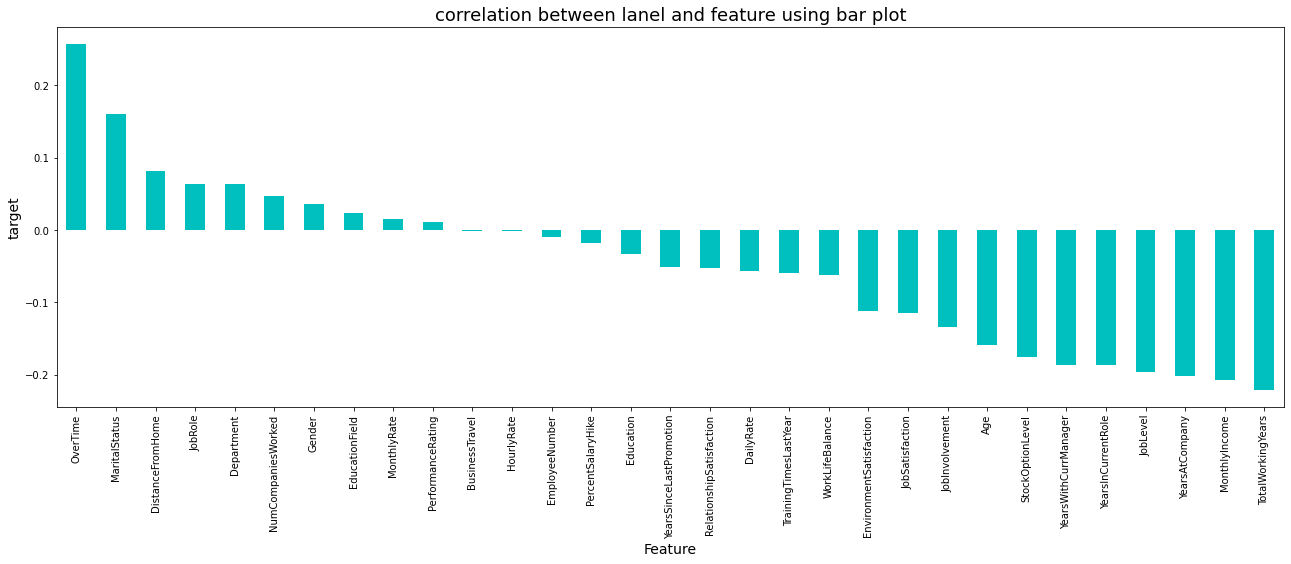

In [95]:
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

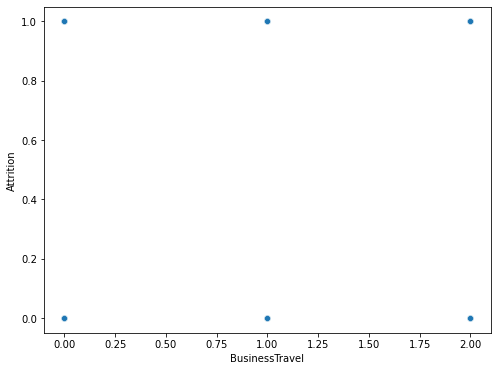

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BusinessTravel',y='Attrition',data=new_df)

plt.show()

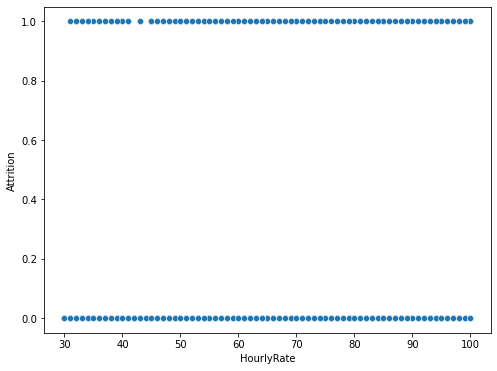

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='HourlyRate',y='Attrition',data=new_df)
plt.show()

we can notice no realation or these features will not effect the attrition, So let us drop thease coloumns

In [98]:
# Dropping irrelevant columns
new_df.drop("BusinessTravel",axis=1, inplace=True)
new_df.drop("HourlyRate",axis=1, inplace=True)
# Seperating lable an features
x=new_df.drop('Attrition',axis=1)
y=new_df['Attrition']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Oversampling

In [99]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

### Feature Scaling using Standard Scalarization

In [100]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.723769,0.843927,1.597053,-1.678408,-0.759360,-0.907102,-1.785261,-0.424387,-1.067007,0.653712,...,-0.339219,-1.434419,-0.975551,0.042412,-2.737982,-2.163491,0.435787,0.493096,-1.120933,0.798585
1,1.654309,-1.302378,-0.352749,0.172942,-1.790238,-0.907102,-1.783518,0.509023,0.937201,-0.693260,...,2.947944,1.416366,0.757207,0.367520,0.287882,0.561908,1.184981,1.252134,0.238570,1.257974
2,0.258500,1.550670,-0.352749,-1.185717,-0.759360,1.496614,-1.780033,1.442432,0.937201,-0.693260,...,-0.339219,-0.484158,-0.975551,-0.137871,0.287882,0.561908,-2.061161,-1.481043,-1.120933,-1.425765
3,-0.206770,1.600220,-0.352749,-0.833304,1.302396,-0.907102,-1.778290,1.442432,-1.067007,0.653712,...,-0.339219,0.466104,-0.975551,0.042412,0.287882,0.561908,0.843166,1.252134,1.134049,-1.425765
4,-0.904674,-0.488712,-0.352749,-1.185717,-1.790238,0.695376,-1.774805,-1.357796,0.937201,0.653712,...,-0.339219,1.416366,0.757207,-0.333323,0.287882,0.561908,-0.783259,-0.229097,0.807083,-0.181586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-0.788357,-1.703995,-0.352749,1.501564,0.271518,-0.907102,-1.285102,-0.424387,-1.067007,0.653712,...,-0.339219,0.466104,1.919190,0.243445,0.248767,-0.800792,1.036220,0.402627,0.176268,1.497370
2312,-0.788357,-1.539697,-0.352749,-0.243082,0.271518,-0.105863,0.283341,-0.424387,-1.067007,0.653712,...,-0.339219,-1.434419,-0.542644,-0.854484,0.074636,0.561908,-0.394512,-0.229097,-0.101084,-0.181586
2313,-0.090452,-0.128821,-2.302552,0.229390,0.271518,-0.907102,-1.360039,0.509023,0.937201,-0.693260,...,-0.339219,0.466104,-0.975551,-0.515327,0.287882,-0.800792,-0.600869,-0.517239,-1.120933,-0.467941
2314,1.537991,0.152833,-0.352749,-0.812137,-0.759360,-0.105863,-1.644101,-1.357796,0.937201,-0.693260,...,-0.339219,0.466104,-0.975551,-1.058514,-0.440423,0.561908,-0.463528,-0.325467,-1.120933,-0.277358


### Checking multicolinearity using VIF:

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"] = x.columns
# Print vif values
vif

,VIF values,Features
0,1.924642,Age
1,1.047778,DailyRate
2,1.987378,Department
3,1.043326,DistanceFromHome
4,1.078554,Education
5,1.054124,EducationField
6,1.044898,EmployeeNumber
7,1.075038,EnvironmentSatisfaction
8,1.058706,Gender
9,1.100741,JobInvolvement


all values are less than 10 there is not that much muticolinearity.

### Model building

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8676258992805755  on Random_state  6


In [103]:
#Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=6)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

#### 1. Decision Tree Classifier

In [107]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8661870503597122
[[299  46]
 [ 47 303]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       345
           1       0.87      0.87      0.87       350

    accuracy                           0.87       695
   macro avg       0.87      0.87      0.87       695
weighted avg       0.87      0.87      0.87       695



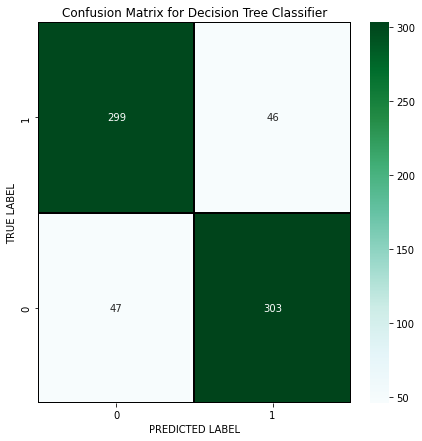

In [108]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#### 2. Random Forest Classifier

In [111]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9165467625899281
[[329  16]
 [ 42 308]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       345
           1       0.95      0.88      0.91       350

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695



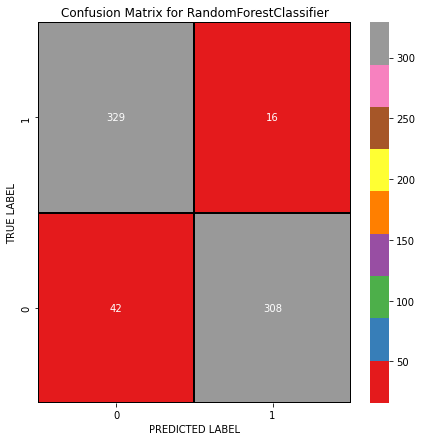

In [112]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set1",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

#### Logistic Regression: 

In [114]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8086330935251799
[[287  58]
 [ 75 275]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       345
           1       0.83      0.79      0.81       350

    accuracy                           0.81       695
   macro avg       0.81      0.81      0.81       695
weighted avg       0.81      0.81      0.81       695



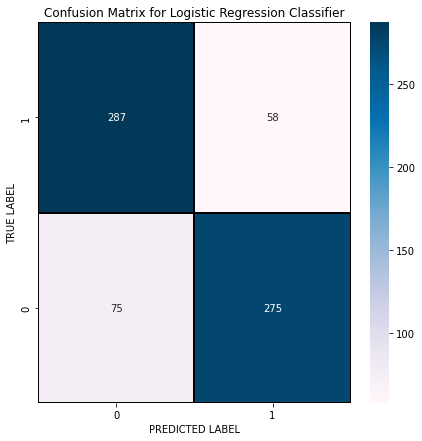

In [115]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

#### Support Vector Machine:

In [118]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8633093525179856
[[305  40]
 [ 55 295]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       345
           1       0.88      0.84      0.86       350

    accuracy                           0.86       695
   macro avg       0.86      0.86      0.86       695
weighted avg       0.86      0.86      0.86       695



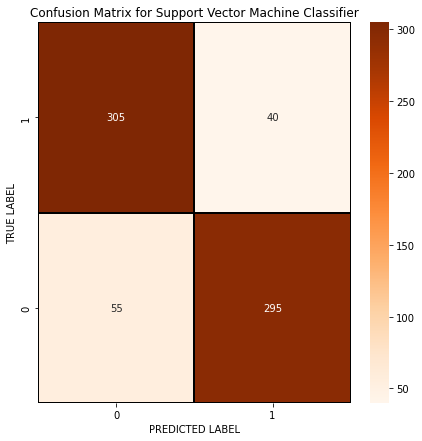

In [119]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

#### Knearest neighbors Classifier

In [124]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8258992805755395
[[241 104]
 [ 17 333]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       345
           1       0.76      0.95      0.85       350

    accuracy                           0.83       695
   macro avg       0.85      0.82      0.82       695
weighted avg       0.85      0.83      0.82       695



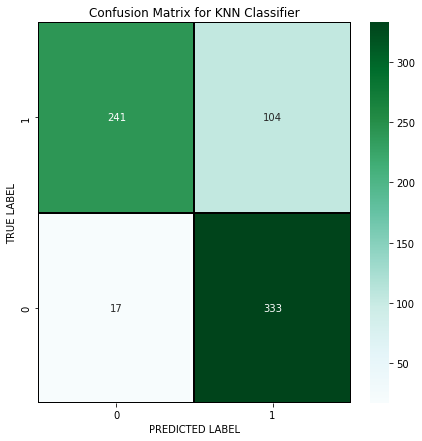

In [172]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

####  Gradient Boost Classifier

In [131]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9079136690647482
[[327  18]
 [ 46 304]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       345
           1       0.94      0.87      0.90       350

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



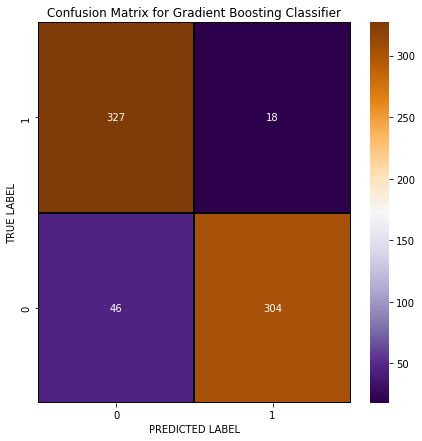

In [173]:
# Lets plot confusion matrix for gradient boosting classifier/:
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuOr_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

#### Ada boost classifier

In [137]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8805755395683453
[[308  37]
 [ 46 304]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       345
           1       0.89      0.87      0.88       350

    accuracy                           0.88       695
   macro avg       0.88      0.88      0.88       695
weighted avg       0.88      0.88      0.88       695



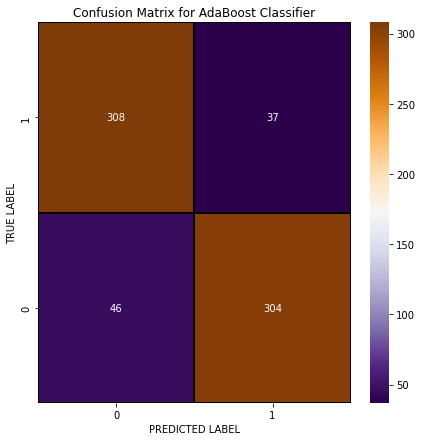

In [174]:
# Lets plot confusion matrix for AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuOr_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

#### Cross Validation score:

In [138]:
from sklearn.model_selection import cross_val_score

# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.6940092723616592
0.8092407090191405
0.7824420942876295
0.8532751173009607
0.7979397855068147
0.6805866909957548
0.5968896626200939


> Inference :

* There is least difference between cross Validation score and accuracy score  for Ada boost classifier, so we will use Adaboost classifier for hyperparmetr turning for better result

####  Hyper parameter tuning 

In [152]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,50],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 11)],
    'algorithm': ['SAMME', 'SAMME.R']
}
GCV=GridSearchCV(ABC, parameters, cv=5)


In [153]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04, 1.05, 1.06, 1.07],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 50]})

In [154]:
GCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.01, 'n_estimators': 50}

In [155]:
model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.01, n_estimators=50)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of AdaBoostClassifier model is : " ,acc*100)

Accuracy of AdaBoostClassifier model is :  88.63309352517985


* Accuracy of model has increased from 88.05 to 88.63 after hyperparameter tuning

#### Plotting AUC-ROC Curve

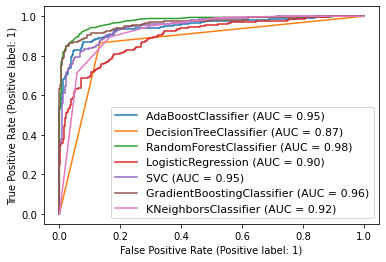

In [160]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(model,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
#plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()


#### Saving the model

In [164]:
import pickle
pickle.dump(model,open("HR_analytics.pkl",'wb'))

#### Predicting using saved model

In [170]:
# Loading the saved model
#with open('HR_analytics.pkl','rb') as f:
#    model=pickle.load(f)

model=pickle.load(open('HR_analytics.pkl','rb'))
#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [171]:
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
690,1,1
691,1,1
692,1,1
693,1,1


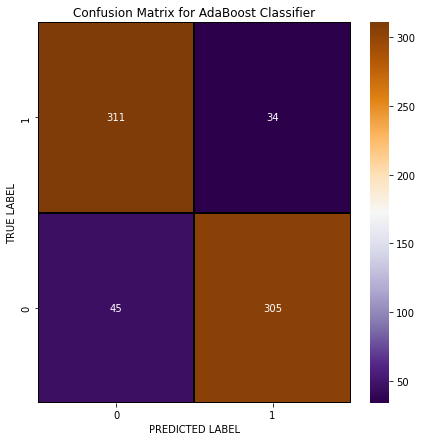

In [177]:
# Lets plot confusion matrix for AdaBoost Classifier for actual value vs predicted
cm = confusion_matrix(df_final["Original"],df_final["Predicted"])
x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuOr_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()